#  Généralité sur les tests et test de Student

In [ ]:
import os
if not os.path.exists("assets_alea"):
    !git clone https://github.com/vincentvigon/assets_alea

In [ ]:
%reset -f

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats
np.set_printoptions(linewidth=400,precision=2,suppress=True)

## Théorie

### Deux hypothèses

Nous sommes en présence de deux hypothèses:  $H_0$ et son contraire $H_1$.

* Exemple 1: on suppose que les éléphants d'Afrique on une espérance de vie de 56 ans.
  * $H_0:$ les éléphants d'une réserve ont une espérance de vie de 56 ans (comme tous les autres).
  * $H_1:$ les éléphants d'une réserve n'ont pas une espérance de vie de 56 ans.   



* Exemple 2:
  * $H_0:$ l'échantillon observé a une distribution gaussienne.
  * $H_1:$ l'échantillon observé n'a pas une distribution gaussienne.




* Exemple 3:
  * $H_0:$ Le sexe et le QI sont indépendants.
  * $H_1:$ Le sexe et QI ne sont pas indépendants.


Notez que les deux hypothèses ne sont pas interchangeables :

* $H_0$ est une hypothèse "précise",
* $H_1$ est une hypothèse "vague".


L'une des deux hypothèses est vraie (l'autre fausse). On dira

* "sous $H_0$ ..." pour dire qu'on se place dans le cas où $H_0$ est vraie,
* "sous $H_1$ ..." pour l'autre alternative.

Mais en fait, nous allons devoir parier sur laquelle des hypothèses est la bonne à partir de l'observation d'un échantillon $X_0,X_1,...,X_i,...$ (ex: des durées de vie d'éléphants de réserve). On va élaborer une règle de décision et on dira

* $\{H_0 \text{ choisie}\}$ pour dire qu'on parie sur $H_0$
* $\{H_1 \text{ choisie}\}$ pour dire qu'on parie sur $H_1$



Attention: Nous en sommes au stade de la modélisation: pour l'instant, notre échantillon n'est pas une suite de nombres, mais une suite de variables aléatoires qui ont toutes la même loi. Naturellement, cette loi n'est pas la même sous $H_0$ et sous $H_1$.

### Une statistique positive

Nous construisons une "statistique" positive $D=D(X_0,X_1,...)$, qui est une fonction de l'échantillon, et qui vérifie:

* sous $H_0$,  $D$ est petit.
* sous $H_1$,  $D$ est grand

(Dans l'exemple des éléphants, que l'on détaillera par la suite, $D$ sera une distance entre la moyenne des durées de vie et 56 ans).

On se fixe ensuite une règle de décision pour quand l'échantillon sera observé. Quand on aura $X_0=x_0,X_1=x_1,...$, on calculera $D=D(x_0,x_1,...)$ et:

*  $D \leq$ seuil  $\Rightarrow$   $\{H_0 \text{ choisie}\}$
*  $D >$  seuil $\Rightarrow$   $\{H_1 \text{ choisie}\}$

Mais comment déterminer le seuil?  En fait, en construisant $D$, on doit s'arranger pour avoir:

* sous $H_0$, la statistique $D$ suit une loi de fonction de répartition $F$ bien connue (ex :   $\chi_2$).
* sous $H_1$,  la statistique $D$ a une forte probabilité d'être très grande.

Dans la suite, on va utiliser la connaissance précise de la loi de $D$ sous $H_0$ pour déterminer le seuil.


### Le principe des 5%

La règle des tests est que:

**"sous $H_0$, l'évènement $\{H_1 \text{ choisie}\}$ doit être peu probable"**

On se fixe  un $\alpha$ petit, c'est le niveau du test. En général on prend $5\%=0.05$.   On souhaite que, sous $H_0$, la probabilité de choisir $H_1$ soit de $\alpha$.  Ainsi, sous $H_0$:
\begin{align*}
\mathbf P[\{H_1 \text{ choisi}\}] = &\mathbf P[D>seuil] = \alpha \\
&\Leftrightarrow  \mathbf P[D\leq seuil] = 1-\alpha \\
&\Leftrightarrow F(seuil) = 1-\alpha \\
&\Leftrightarrow  seuil = F^{-1} (1-\alpha)
\end{align*}


Donc en résumé:


*  $D \leq F^{-1}(1-\alpha)$   $\Rightarrow$   $\{H_0 \text{ choisie}\}$
*  $D > F^{-1}(1-\alpha)$  $\Rightarrow$   $\{H_1 \text{ choisie}\}$




### Puissance d'un test

Pour construire le test, on aurait pu se baser sur la règle symétrique à la précédente:

**"sous $H_1$, l'évènement $\{H_0 \text{ choisie}\}$ doit être peu probable"**

Mais c'est beaucoup plus dur car, $H_1$ étant une hypothèse vague, on connait mal la loi de la statistique $D$ sous $H_1$.

Cependant, on dit qu'un test a la puissance $\beta$ lorsque, sous $H_1$, la probabilité de $\{H_1 \text{ choisie}\}$ est toujours plus grande que $\beta$. Par exemple, un test de niveau $5$% et de puissance 1 est quasi parfait:

* Sous $H_1$, il ne se trompe jamais.
* Sous $H_0$, ils ne se trompe que dans $5$% des cas.


Il est parfois très difficile de déterminer la puissance d'un test, mais tous les tests "simples" que nous allons rencontrer par la suite ont une puissance proche de 1 quand la taille de l'échantillon est grande.


***Remarque:*** Un test de puissance 0 serait très dangeureux: cela signifie que, dans certain cas, sous $H_1$ on choisit $H_0$ avec proba 1!






### Restreindre l'ensemble des cas

Parfois $H_1$ est contraire de $H_0$ mais "dans un contexte donné". Par exemple on peut supposer que les éléphants d'une réserve vivent au moins aussi vieux que ceux qui vivent à l'extérieur.  Toujours en supposant que les éléphant d'Afrique on une espérance de vie de 56 ans, le test devient:

* $H_0:$ les éléphants d'une réserve ont une espérance de vie de 56 ans (comme tous les autres).
* $H_1:$ les éléphants d'une réserve ont une esprérance de vie de plus de 56 ans.

Ce que cela change? Cela augmente la puissance du test bien sûr. Nous verrons à la fin l'exemple du test de Mann-whitney où l'on est obligé de réduire $H_1$, sinon le test a une puissance dérisoire (et donc il est dangereux).

### $p$-valeur

Mais l'histoire ne s'arrête pas là, car on aimerait avoir un critère quantitatif pour dire si on choisit $H_1$ franchement, ou du bout des lèvres. On a :
\begin{align*}
\{H_1 \text{ choisie} \} \Leftrightarrow D > F^{-1}(1-\alpha) \\
\Leftrightarrow F(D) >1- \alpha \\
\Leftrightarrow 1 -F(D) < \alpha
\end{align*}

On définit alors $p\text{-valeur} =  1 -F(D)$ et du coup, plus cette $p$-valeur est petite et plus l'hypothèse $H_1$ est la bonne.

$$
\begin{array}{ll}
p\text{-valeur}  \sim  0    & H_1 \text{ est } \star\star\star \\
p\text{-valeur}  \sim  0.01    &H_1 \text{ est } \star\star \\
p\text{-valeur}  \sim  0.05    &H_1 \text{ est } \star \\
p\text{-valeur}  \sim  0.1    &H_1 \text{ est }  \text{ bof-bof }
\end{array}
$$

### Avec une statistique signée

C'est une très légère variante du test avec une statistique positive. On écrit  quand même les détails, car le diable s'y cache.  


On est en présence de deux hypothèses $H_0$ et son contraire $H_1$.  On construit une "statistique" $T=T(X_0,X_1,...) \in \mathbb R$ pour qu'en loi:

* sous $H_0$,  $|T|$ est petit.
* sous $H_1$,  $|T|$ est grand

Une fois que l'on dispose d'une réalisation de notre échantillon, on calcule $T$ et :

* $|T| \leq$ seuil  $\Rightarrow$    $\{H_0 \text{ choisie}\}$
* $|T| >$  seuil  $\Rightarrow$   $\{H_1 \text{ choisie}\}$

Jusqu'à présent, tout se passe comme si on s'intéressait à la statistique positive $D = |T|$. La différence va être dans la détermination du seuil, qui va reposer sur la fonction de répartition de $T$, et non de $|T|$.

En fait, quand on construit $T$, on doit faire en sorte que :

* sous $H_0$,  $T$ suive une loi de fonction de répartition $F$ connue (ex :  gaussienne ou student).
* sous $H_1$,  $T$ soit très grande en valeur absolue.


On souhaite que, sous $H_0$, la probabilité de choisir $H_1$ soit de $\alpha$.  Ainsi : Sous $H_0$ :
\begin{align*}
\mathbf P[|T|>seuil] = \alpha  &\Leftrightarrow  \mathbf P[|T| \leq seuil] =1- \alpha \\
& \Leftrightarrow    \mathbf P[-seuil \leq T \leq seuil]  =1- \alpha  \\
& \Leftrightarrow  seuil = F^{-1} (1-\frac {\alpha}2)
\end{align*}




Donc en résumé

* $|T| \leq  F^{-1}(1-\frac {\alpha}2)$   $\Rightarrow$    $\{H_0 \text{ choisie}\}$
* $|T| > F^{-1}(1-\frac {\alpha}2)$     $\Rightarrow$   $\{H_1 \text{ choisie}\}$


On aimerait avoir un critère quantitatif pour dire si on choisit $H_1$ franchement, ou du bout des lèvres. On a :
\begin{align*}
\{\text{choisir } H_1\} & \Leftrightarrow      |T| >  F^{-1}(1-\frac {\alpha}2) \\   
&\Leftrightarrow F(|T|) >    (1-\frac {\alpha}2)\\
&\Leftrightarrow 1 -F(|T|) \leq \frac {\alpha}2 \\
&\Leftrightarrow 2 [1 -F(|T|)] \leq \alpha
\end{align*}
On définit alors $p$-valeur =  $2 [1 -F(|T|)]$ et du coup, plus cette $p$-valeur est petite et plus l'hypothèse $H_1$ est la bonne.


Il faut absolument que vous soyez capable de refaire cette série de calculs sur une feuille, sans regarder aucune note. Beaucoup d'erreurs (ex: dans les blogs de stats) proviennent d'une confusion entre $\alpha, 1-\alpha$ ou entre $\alpha$ et $\frac \alpha 2$ ou entre une loi du $\chi_2$ (positive) et une loi de Student (signée).   



#### ♡♡

***A vous:***  En fait il y a une coquille. Pour que les formules ci-dessus soient valables, il faut que la loi de $T$ ait une propriété supplémentaire. Laquelle?






## Tests de Student



### Test de Student de conformité pour 1 échantillon





Ce test permet de vérifier si un échantillon a une espérance donnée. Considérons par exemple des réserves naturelles en Afrique, dans lesquelles vivent des éléphants. On aimerait savoir si dans ces réserves, les éléphants ont la même espérance de vie que l'ensemble des éléphants d'Afrique, à savoir 56 ans. Pour cela on va comparer la durée de vie moyenne des éléphants des réserves avec le nombre 56.

In [ ]:
""" générateur de durée de vie fictive pour deux réserves distinctes.
Faites comme si vous ne savez pas comment ces données sont construites. """
def generator_lifetime_reserve1():
    return stats.poisson.rvs(mu=56, size=50)

def generator_lifetime_reserve2():
    return stats.poisson.rvs(mu=63, size=62)

In [ ]:
sample1 = generator_lifetime_reserve1()
sample2 = generator_lifetime_reserve2()
print("durées de vies dans la reserve1:\n",sample1)
print("durées de vies dans la reserve2:\n",sample2)
print("moyenne reserve1:",np.mean(sample1))
print("moyenne reserve2:",np.mean(sample2))

La moyenne de la réserve1 est assez proche de 56, celle de la réserve2 est plutôt éloignée, mais il faudrait quantifier cela. On construit donc une statistique que l'on comparera à un seuil.



In [ ]:
""" une fonction qui effectue le test de student"""
def test_observedMean_expectedMean(sample,expectedMean,alpha):
    n = len(sample)
    df=n-1
    """ moyenne"""
    X_bar = sample.mean()
    """ variance empirique"""
    S = sample.std(ddof=1)**2
    """ la statistique de test: c'est une distance renormalisée"""
    abs_T = np.abs((X_bar - expectedMean) / (np.sqrt(S/n)))
    """ valeur critique =   quantile (1 - alpha / 2) de la loi de Student"""
    critical_value = stats.t(df=df).ppf(q=1 - alpha / 2)
    """ p-value """
    p_value = 2*(1 - stats.t(df=df).cdf(abs_T))

    return abs_T,critical_value,p_value

In [ ]:
alpha=0.05

statistic, critical_value, p_value=test_observedMean_expectedMean(sample1,56,alpha)
print("RESERVE1")
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

statistic, critical_value, p_value = test_observedMean_expectedMean(sample2, 56, alpha)
print("RESERVE2")
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

#### ♡♡

***A vous:***  

*  Lisez dans le programme suivant quelle est cette statistique, et quelle en est la loi.
*  Utilise-t-on la théorie des statistiques signées ou bien celle des statistiques positives?
*  quelle est la conclusion des tests?



### Conditions d'applications de ce test de Student :

* soit il y a suffisamment de données : $n>30$
* soit les données sont 'approximativement' gaussiennes

Remarques :

* Ces conditions d'application peuvent arriver simultanément
* Quand  $n<30$, il faudrait donc  vérifier la "normalité"  (=gaussiannité) des données.
* Quand $n>30$, on pourrait remplacer la loi de student par la loi normale dans ce test.

Remarque: Pour des jeux de données de taille 50, utiliser un quantil normal ou de student, c'est assez proche:

In [2]:
alpha=0.05
print(stats.norm.ppf(1 - alpha / 2))
print(stats.t(df=50).ppf(q=1 - alpha / 2))

### Le jeu des 5%


Jouons au "jeu des 5%" c.à.d vérifions que:

* sous H0, on rejette quand même H0 dans 5% des cas
* sous H1, on rejette H0 quasi-toujours

On peut jouer à ce jeu car on peut générer plusieurs fois nos données.

In [ ]:
def fivePercentGame(dataGenerator):
    nbEssaie=1000
    alpha = 0.05
    nbRejection=0
    for i in range(nbEssaie):
        sample=dataGenerator()
        statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 56, alpha)
        """comment peut-on écrire cette condition différemment, en utilisant la p-valeur?"""
        if statistic>critical_value:
            nbRejection+=1

    print("proportion de rejet:",nbRejection/nbEssaie)

print("RESERVE1")
fivePercentGame(generator_lifetime_reserve1)
print("RESERVE2")
fivePercentGame(generator_lifetime_reserve2)

#### ♡♡♡

***A vous:*** D'après ces observations, quelle est la puissance du test de Student?
Démontrez cela: démontrez que, lorsque l'échantillon est de très grande taille, sous $H_1$, l'évènement $\{H_1 \text{ choisi}\}$ arrive avec proba 1.




### Test de student de comparaison (entre 2 échantillons)

Il permet de vérifier si deux échantillons INDÉPENDANTS (mais pas forcément de même taille) ont la même espérance. Par exemple, on veut savoir si les éléphants de deux réserves disjointes ont la même espérance de vie.

In [ ]:
def test_observerMean1_observedMean2(sample1, sample2, alpha):

    n1=len(sample1)
    n2=len(sample2)
    df=n1+n2-2
    x_bar1=sample1.mean()
    x_bar2=sample2.mean()
    S1= sample1.std(ddof=1) ** 2
    S2= sample2.std(ddof=1) ** 2

    S= (S1*(n1-1) + S2*(n2-1))/(n1+n2-2)

    abs_T=np.abs ((x_bar1-x_bar2)/(np.sqrt(S * (1/n1+1/n2) )))
    critical_value = stats.t.ppf(q=1 - alpha / 2, df=df)
    p_value=2*(1-stats.t.cdf(abs_T,df=df))

    return abs_T,critical_value,p_value

In [ ]:
dt = np.array([24, 43, 58, 71, 43, 49, 61, 44, 67, 49, 53, 56, 59, 52, 62, 54, 57, 33, 46, 43, 57])
dc = np.array([42, 43, 55, 26, 62, 37, 33, 41, 19, 54, 20, 85, 46, 10, 17, 60, 53, 42, 37, 42, 55, 28, 48])

statistic, critical_value, p_value=test_observerMean1_observedMean2(dt,dc,0.05)
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)
print("\navec une fonction toute faite:")
res=stats.ttest_ind(dt, dc)
print("statistic:", res.statistic)
print("p_value:", res.pvalue)

### Influence de la taille des échantillons


Conditions pratiques d'application du test de Student à deux échantillons :

* soit les deux échantillons sont suffisamment gros : n1>30 et n2>30
* soit ils ont à peu près la même variance (rapport de 1 à 3)  et ils sont approximativement gaussiens.



Les conditions n1>30 et n2>30 sont indiquatives. En fait, cela dépend aussi des lois sous-jacentes: par exemple, si les deux espérances théoriques sont 25 et 25.1, il faudra des échantillons de grande taille pour voir la différence.

C'est un des gros problèmes de tous les tests: ils dépendent toujours de la taille de l'échantillon. Typiquement, si on travaille avec des échantillons de taille 1 million issus de la "vraie vie" (=non simulés), les tests rejetteront toujours $H_0$. En effet, rappelons que $H_0$ est une hypothèse "précise", qui suppose une égalité entre deux lois (ou deux espérances). Or dans la "vraie vie" il n'y a jamais d'égalité parfaite. Et 1 million de données permettent de détecter la plus infime différence.

Cette triste vérité est rarement dite dans les livres de stats. Appelons-la l'effet "vraie vie et grosse donnée". À l'inverse, quand on a très peu de données, les tests ont tendance à toujours accepter $H_0$: c'est l'effet "petite donnée".

## Un grand jeu de données à partager


### Quizz


 voici des chiffres correspondant à des consomations annuelles de liquide par habitant. Mais de quel liquide s'agit-il d'après vous? (pour la France, vous aurez la réponse dans ce TP)

* Mexique : 105,9 litres
* Norvège: 99,5 litres
* Etats-Unis: 99,5 litres
* Chili: 78,2 litres
* Dominique: 75,9 litres
* Sainte Lucie: 74,5 litres
* Emirats Arabes Unis: 73,5 litres
* Belgique: 69,9 litres


### Data


Observons maintenant les données ci-dessous. Il s'agit d'une dataFrame: chaque ligne représente un français.

* La première colonne correspond à la quantité de bière consommée annuellement
* La seconde colonne correspond à la quantité de vin consommée annuellement

Observons les données pour voir si, à l'oeil, elles ont la même distribution.

In [ ]:
z=np.loadtxt("assets_alea/dataframe/biereVin.csv",delimiter=",")
biere,vin=z[:,0],z[:,1]

print("début de la dataframe\n",z[:5,:])
print("nombre total de donnée:",len(biere))
print("moyenne bière",np.mean(biere))
print("moyenne vin",np.mean(vin))
print("matrice de corrélation:\n",np.corrcoef(z.T))

fig,ax=plt.subplots()
ax.hist(vin,20,label="vin")
ax.hist(biere,20,label="biere",alpha=0.5)
ax.legend();

#### ♡♡♡

***A vous:*** Améliorez les histogrammes ci-dessus pour mieux comparer les distributions.

In [ ]:
z=np.loadtxt("assets_alea/dataframe/biereVin.csv",delimiter=",")
biere,vin=z[:,0],z[:,1]

fig,ax=plt.subplots(2,1,figsize=(6,8),sharex=True)

#on fait attention aux bins
#on met les battons par paire


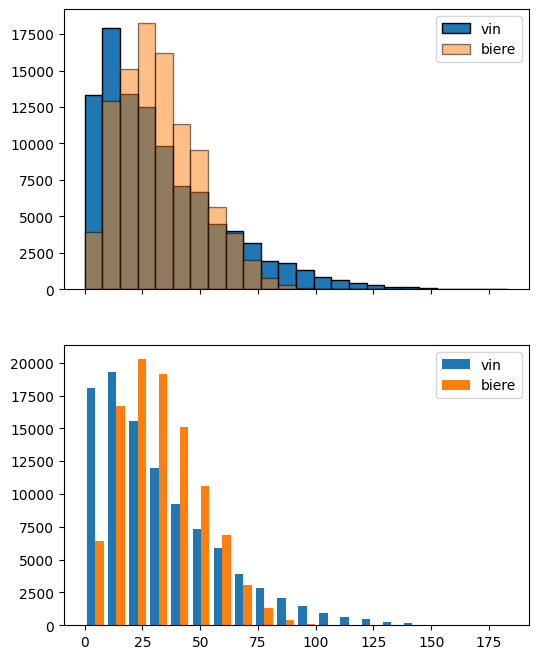

In [ ]:
#--- To keep following outputs, do not run this cell! ---

### Les français boivent-ils autant de vin que de bière

La question "Les français boivent-ils autant de vin que de bière" est assez ambigüe. Notons $X$ la consommation de bière d'un français et $Y$ celle de vin. La question peut s'interpréter de trois manières différentes :

1. Chaque individu français boit (à peu près) autant de bière que de vin. Ceci revient à dire que $X = Y$.
1. Peut-être que certains français boivent beaucoup de bière et peu de vin, d'autres l'inverse, mais globalement il y a autant de personnes qui boivent beaucoup de vin que de personnes qui boivent beaucoup de bière, etc. Ceci revient à dire que $X$ et $Y$ suivent une même loi (et ont donc des histogrammes similaires), mais ne suppose aucune relation particulière entre $X$ et $Y$ (contrairement à la première interpértation).
1. Peut-être qu'il y a plus de français qui consomment beaucoup de vin que de français qui consomment beaucoup de bière, mais qu'il y en a aussi plus qui ne consomment pas de vin du tout ; si bien qu'en moyenne la quantité de vin consommée par les français est la même que la quantité de bière consommée. Ceci revient à dire que $\mathbb E (X) = \mathbb E(Y)$, sans pour autant supposer que $X$ et $Y$ ont la même loi.

Commentons rapidement chacune de ces interprétations.
La validité de la première est réglée par simple observation des données : il faudrait que les échantillons de $X$ et de $Y$ soient (à peu près) identiques, ce qui n'est pas le cas.
Le test de la deuxième hypothèse sort du cadre du test de Student, qui compare des espérances (or une loi ne peut être caractérisée par son espérance, ni même par un nombre fini de moments). On la laisse donc de côté (on peut tout de même noter que les histogrammes ne semblent pas valider cette hypothèse).
C'est donc la troisième hypothèse qui nous intéresse. Soumettons-la à un test de Student.

### Test de Student

Commençons par remarquer que les deux échantillons ne sont pas indépendants. En effet, la matrice de corrélation nous montre que la corrélation entre `vin` et `biere` (coefficients non diagonaux) n'est pas nulle.

Introduisons des notations : on modélise les observations par les couples aléatoires i.i.d $(X_1,Y_1)$, $(X_2,Y_2)$, … $(X_n, Y_n)$ (nous savons que $X$ et $Y$ ne sont pas indépendantes, mais en principe ces couples sont bien indépendants entre eux, car ils sont des observations d'individus différents, représentatifs de la population française). Comme $X$ et $Y$ ne sont pas indépendants, le test de Student de comparaison des espérances n'est pas applicable. Mais comme $\mathbb E (X) = \mathbb E(Y) \Longleftrightarrow \mathbb E (X - Y) = 0$, on peut appliquer le test de Student de conformité à $(X-Y)$ avec comme moyenne attendue 0. Voyons ce que cela donne :

In [ ]:
"""
Test de Student de E(X-Y) = 0 sur l'ensemble des données
"""
alpha=0.05
sample = vin - biere
statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 0, alpha)
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

p_value très faible -> hypothèse H0 rejetée (***)

### Par parquet

In [ ]:
"""
Test de Student de E(X-Y) = 0 par paquets de données
"""
sample_size = 50
nb_sample = len(biere) // sample_size
nbRejection = 0
p_value_list = []
for i in range(nb_sample):
    sample = vin[i*sample_size:(i+1)*sample_size] - biere[i*sample_size:(i+1)*sample_size]
    statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 0, alpha)
    p_value_list.append(p_value)
    if statistic>critical_value:
        nbRejection+=1

print("Nombre d'échantillons :", nb_sample)
print("Proportion de rejet :", nbRejection / nb_sample)
print("p-value moyenne :", np.mean(p_value_list))


Proportion de rejet proche de alpha -> hypothèse H0 acceptée

### Bilan


Nous savons en théorie que sous $H_0$, la proportion de rejet est proche de $\alpha$ (niveau du test), tandis que sous $H_1$ elle est proche de 1 ( puissance du test).

En passant les données par parquet, on voit que la proportion de rejet est proche de $\alpha = 0.05$, c'est donc l'hypothèse $H_0$ qui est validée par ce test. Autrement dit, les français boivent autant de bière que de vin, au sens défini plus haut.


On constate que le test effectué sur la globalité des données contredit cette conclusion puisqu'il valide $H_1$ avec une `p_value`  très faible. En fait, comme ce test est fait sur un nombre de données très élevé (100 000), il est bien plus fin et il décèle que $H_0$ n'est pas vraiment vraiment vraie : c'est l'effet "vraie vie et grosse donnée".

En gros, un test précis rejette l'hypothèse $H_0$ tandis qu'un test plus grossier la valide : les français ne boivent donc pas précisément la même quantité de bière que de vin, mais cette quantité est tout de même grossièrement la même.



### Vin-Coca

Voyons ce que cela donne pour le vin et le coca :

In [ ]:
z=np.loadtxt("assets_alea/dataframe/vinCoca.csv",delimiter=",")
vin,coca=z[:,0],z[:,1]

print("début de la dataframe\n",z[:20,:].T)#on transpose pour l'affichage
print("nombre total de donnée:",len(vin))
print("moyenne vin",np.mean(vin))
print("moyenne coca",np.mean(coca))
print("matrice de corrélation:\n",np.corrcoef(z.T))

fig,ax=plt.subplots(2,1,figsize=(6,8),sharex=True)

ax[0].set_title("Bins communs")
bins = np.linspace(0, max(np.max(vin), np.max(coca)), 21)
ax[0].hist(vin,bins=bins,label="vin",edgecolor="k")
ax[0].hist(coca,bins=bins,label="coca",alpha=0.5,edgecolor="k")
ax[0].legend()

ax[1].set_title("Histogrammes en parallèle")
ax[1].hist([vin,coca],20,label=["vin","coca"])
ax[1].legend();

In [ ]:
"""
Test de Student de E(X-Y) = 0 sur l'ensemble des données
"""
z=np.loadtxt("assets_alea/dataframe/vinCoca.csv",delimiter=",")
vin,coca=z[:,0],z[:,1]

sample = vin - coca
statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 0, alpha)
print("statistic:", statistic)
print("critical_value:", critical_value)
print("p_value:", p_value)

In [ ]:
"""
Test de Student de E(X-Y) = 0 par paquets de données
"""
sample_size = 100
nb_sample = len(vin) // sample_size
nbRejection = 0
p_value_list = []
for i in range(nb_sample):
    sample = vin[i*sample_size:(i+1)*sample_size] - coca[i*sample_size:(i+1)*sample_size]
    statistic, critical_value, p_value = test_observedMean_expectedMean(sample, 0, alpha)
    p_value_list.append(p_value)
    if statistic>critical_value:
        nbRejection+=1

print("Nombre d'échantillons :", nb_sample)
print("Proportion de rejet :", nbRejection / nb_sample)
print("p-value moyenne :", np.mean(p_value_list))

Conclusion: on est dans un cas très limite. En fonction du `sampling_size` on accepte ou on rejette:

* `sampling_size=1000` : proportion de rejet = 0.97
* `sampling_size=250` : proportion de rejet = 0.51
* `sampling_size=100` : proportion de rejet = 0.239

On aurait quand même tendance à dire qu'il faut rejeter `H0` ; et puis il est bien connu que les français préfèrent le vin au coca !